# The Sparks Foundation - Graduate Rotational Internship Program 
<hr/>

## Data Science & Business Analytics


### Author- Jocelyne Gerda Sohkhlet

# Task 4 : Exploratory Data Analysis - Terrorism

#### Objective:- 

 - As a Security/Defense analyst find out the hotzone of terrorism and drive security issues and insight you can drive by EDA.

#### About Dataset:

- It consist information on more than 180,000 Terrorist Attacks.
- Includes information of terrorist attacks across the globe from 1970 to 2017.
- Includes systematic data on domestic as well as international terrorist incidents that have occurred during a specific time period.

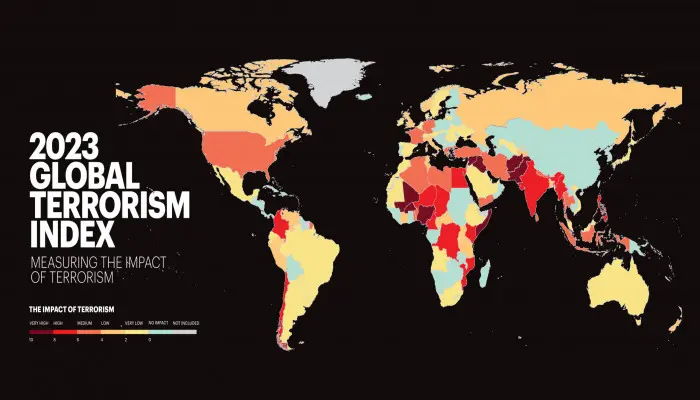

## Import Libraries
<hr/>

In [2]:
#Importing Useful Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings 
warnings.filterwarnings("ignore")

##  Reading & Understanding the Data
<hr/>

In [2]:
#Importing the Data
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = 'latin-1')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


##  Data Preparation and Cleaning

<hr/>

In [6]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
df = data.copy()

In [8]:
df.dropna(axis=1, how = "all")

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


##### Since it contains 135 columns. They have a huge proportion in dataset and Learning them doesn't make any sense. So, we will rename the columns name for better understaning and then we will only extract necessary columns.

In [9]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 'provstate':'State,' ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [10]:
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType', 'Killed', 'Wounded', 'Target', 'Summary','Group','Target_type','Weapon_type', 'Motive']]

In [11]:
df['Casualities']= df['Killed']+df['Wounded']

In [12]:
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [13]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [124]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


##### Insigts:
- The min no. of people Killed in a Terrorist Attack is 0 and the maximum is 1570.
- The min no. of people Wounded in a Terrorist Attack is 0 and the maximum is 8191.

## Basic Analysis
<hr/>

In [22]:
print('Country with Highest Terrorist Attacks:' ,df['Country'].value_counts().index[0])
print('Region with Highest Terrorist Attacks:' ,df['Region'].value_counts().index[0])
print('Most common Weapon used in a Terrorist Attacks:' ,df['Weapon_type'].value_counts().index[0])
print('Maximum people Killed in a Terrorist Attacks:' ,df['Killed'].max(),'that took place in', df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Region with Highest Terrorist Attacks: Middle East & North Africa
Most common Weapon used in a Terrorist Attacks: Explosives
Maximum people Killed in a Terrorist Attacks: 1570.0 that took place in Iraq


## Number of Terrorist Activities Vs Year

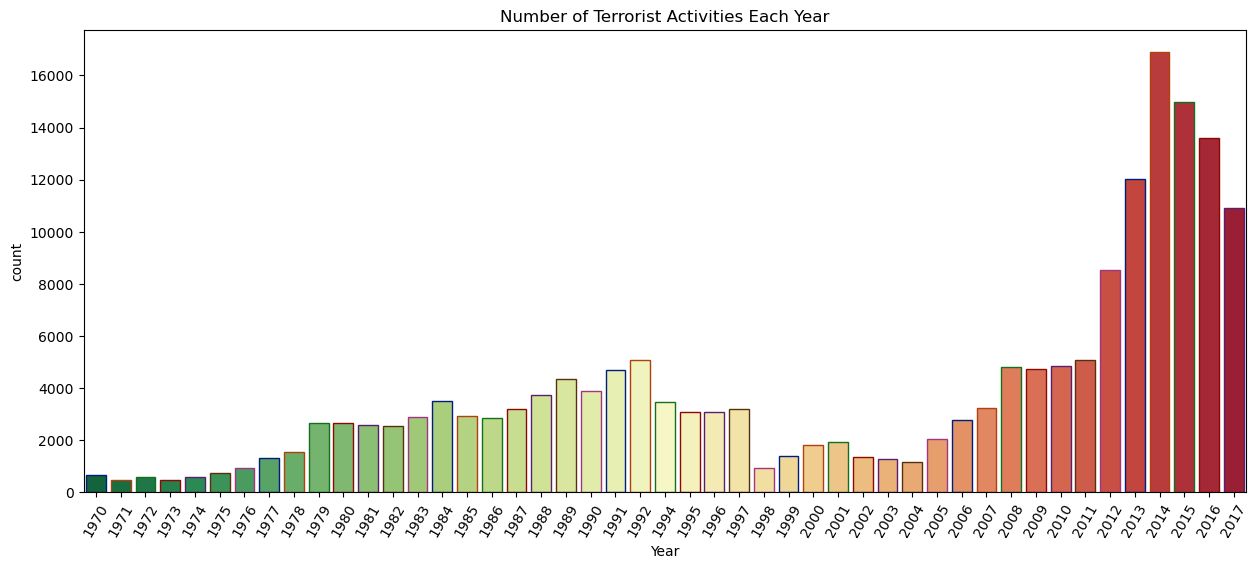

In [103]:
plt.subplots(figsize =(15,6))
sns.countplot('Year', data=df, palette= 'RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title("Number of Terrorist Activities Each Year")
plt.show()

##### Insights:
- 2014 and 2015 has a large number of Terrorist Activities.
- While the Government is taking measure and action against Terrorism but it's inceasing yearly.

### Method of Attack

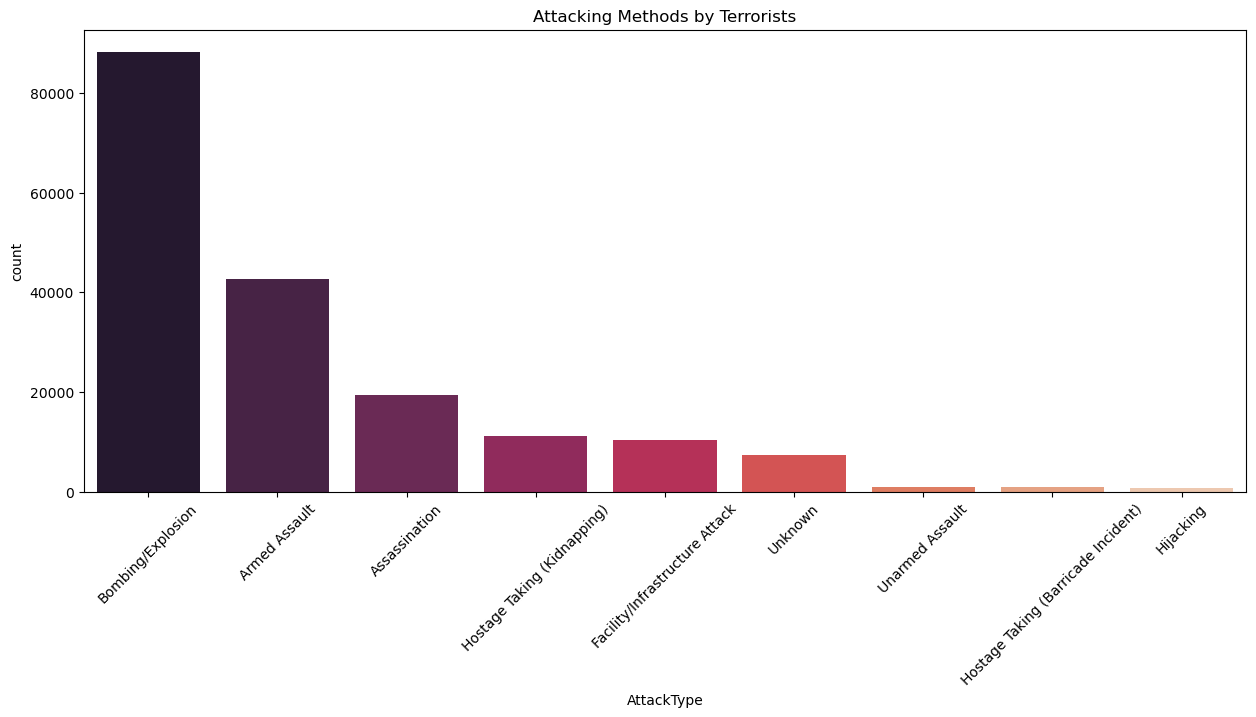

In [44]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType', data=df, palette='rocket',order = df["AttackType"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Attacking Methods by Terrorists")
plt.show()

#### Insights:
- Bombling & Explosion is the most used Attacking Method.
- Followed by Armed Assault. 

### Type of Target 

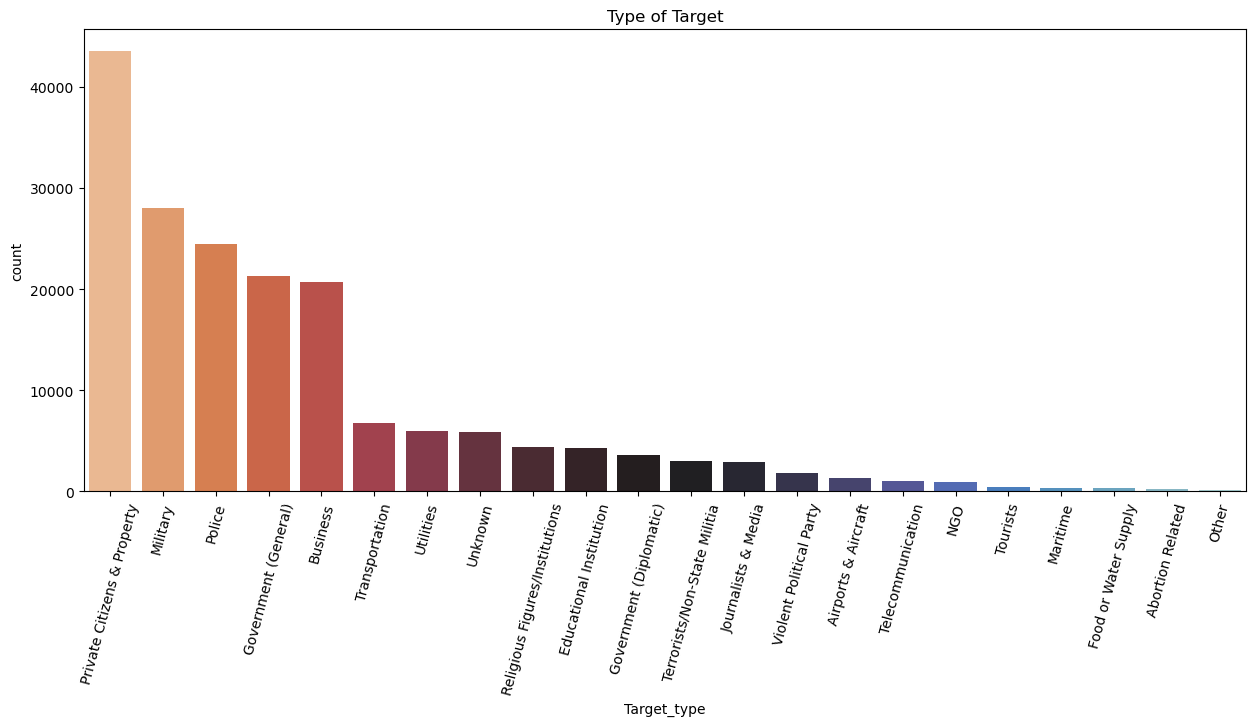

In [51]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type', data=df, palette='icefire_r',order = df["Target_type"].value_counts().index)
plt.xticks(rotation=75)
plt.title("Type of Target")
plt.show()

#### Insights:
- Private Citizens & Property is the most Targeted.
- Followed by Military then Police.

### Hot Zones of Terrorism

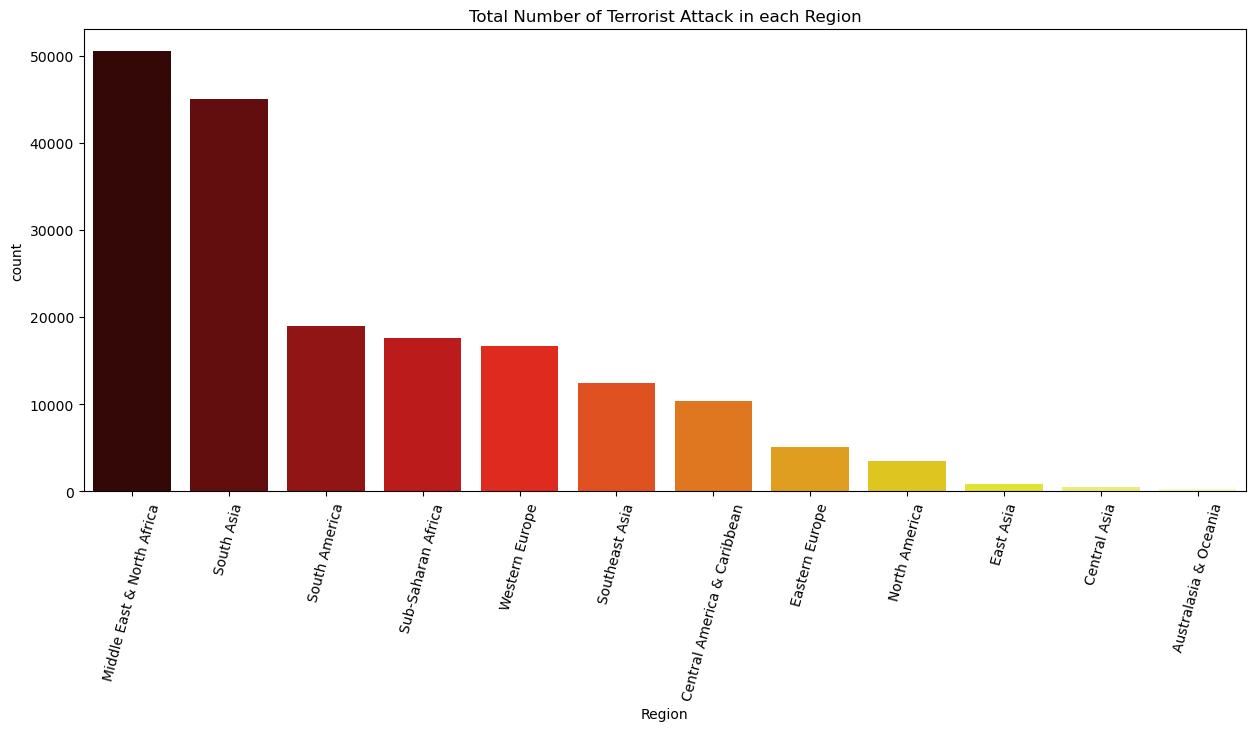

In [52]:
plt.subplots(figsize=(15,6))
sns.countplot('Region', data=df, palette='hot',order = df["Region"].value_counts().index)
plt.xticks(rotation=75)
plt.title("Total Number of Terrorist Attack in each Region")
plt.show()

#### Insight:
- Hot Zones is in The Middle East & North Africa followed by South Africa.
- It can be seen that almost half of the Terrorist Activities are conducted in these two Regions. 

### Attack Type Vs Region

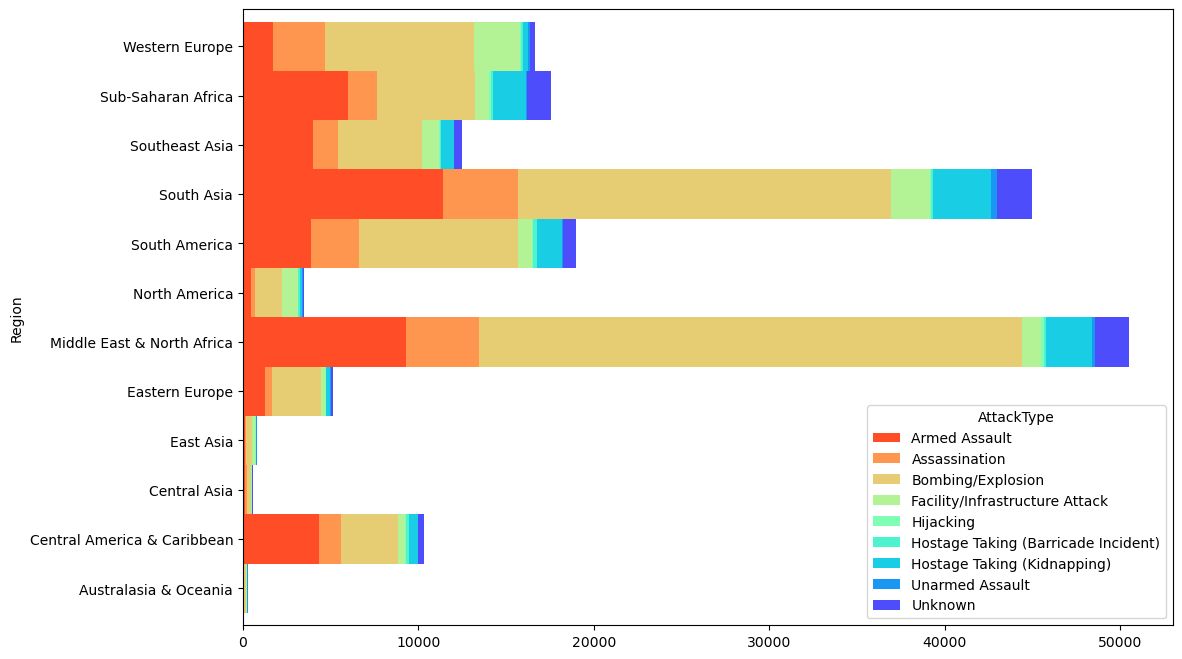

In [66]:
pd.crosstab(df.Region, df.AttackType).plot.barh(stacked= True, width=1, color = sns.color_palette('rainbow_r',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

#####  Insight:
- Various Regions are affected by Various types of Attack Type.

### Terrorism By Country

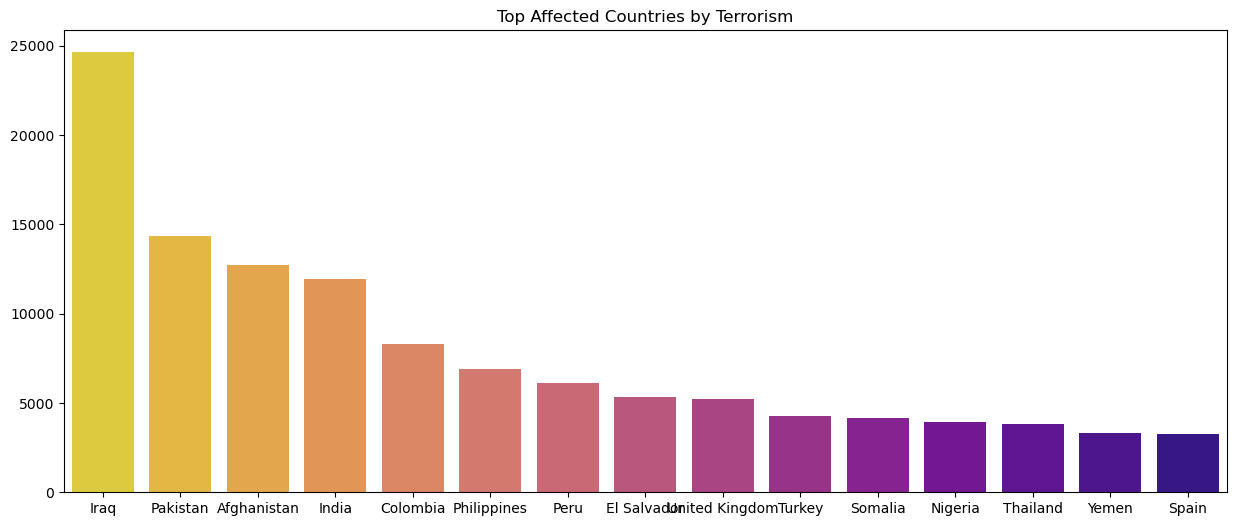

In [70]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values, palette='plasma_r')
plt.title("Top Affected Countries by Terrorism")
plt.show()

##### Insights :
- Iraq is the most affected county by terrorism from the year 1970 to 2017.

### Attack Vs Killed

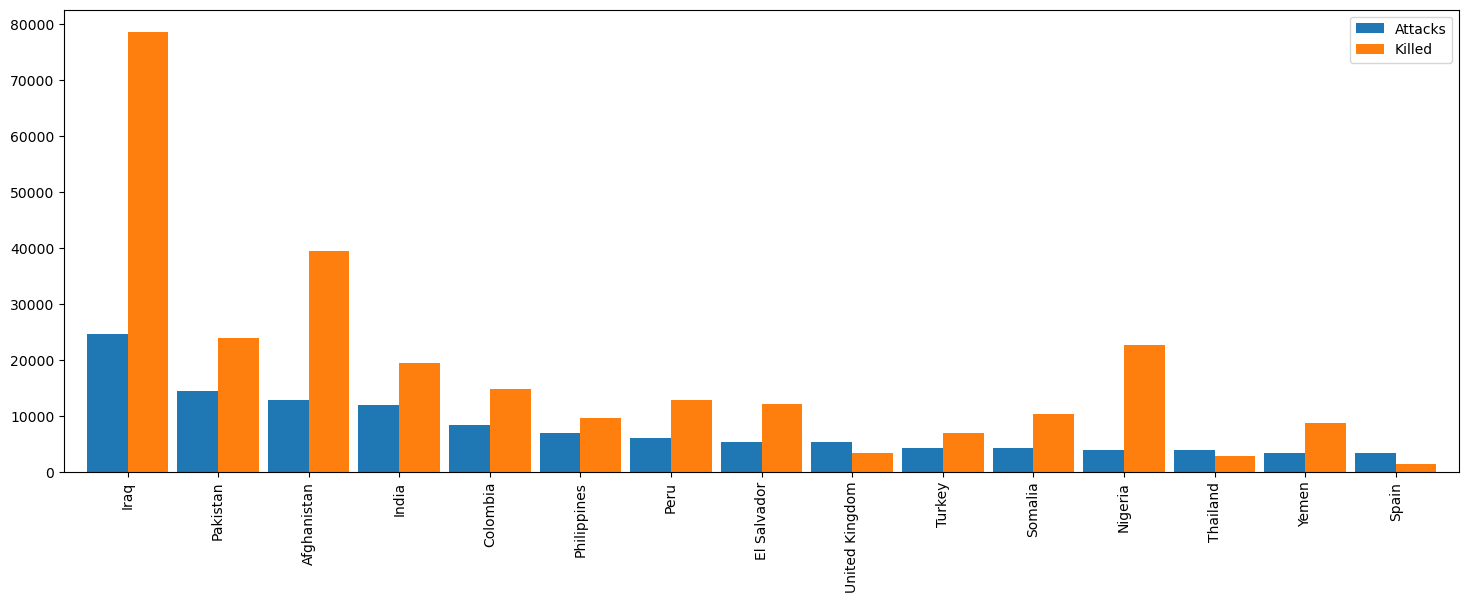

In [71]:
coun_terror = df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=["Attacks"]
coun_kill= df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill, left_index=True, right_index=True, how="left").plot.bar(width=0.9)
fig= plt.gcf()
fig.set_size_inches(18,6)
plt.show()

##### Insights:
- There is a huge difference between no. of people died and no. of attacks. 
- This shows that each attack has taken the lives of so many innocent people.

### Most Notorious Groups

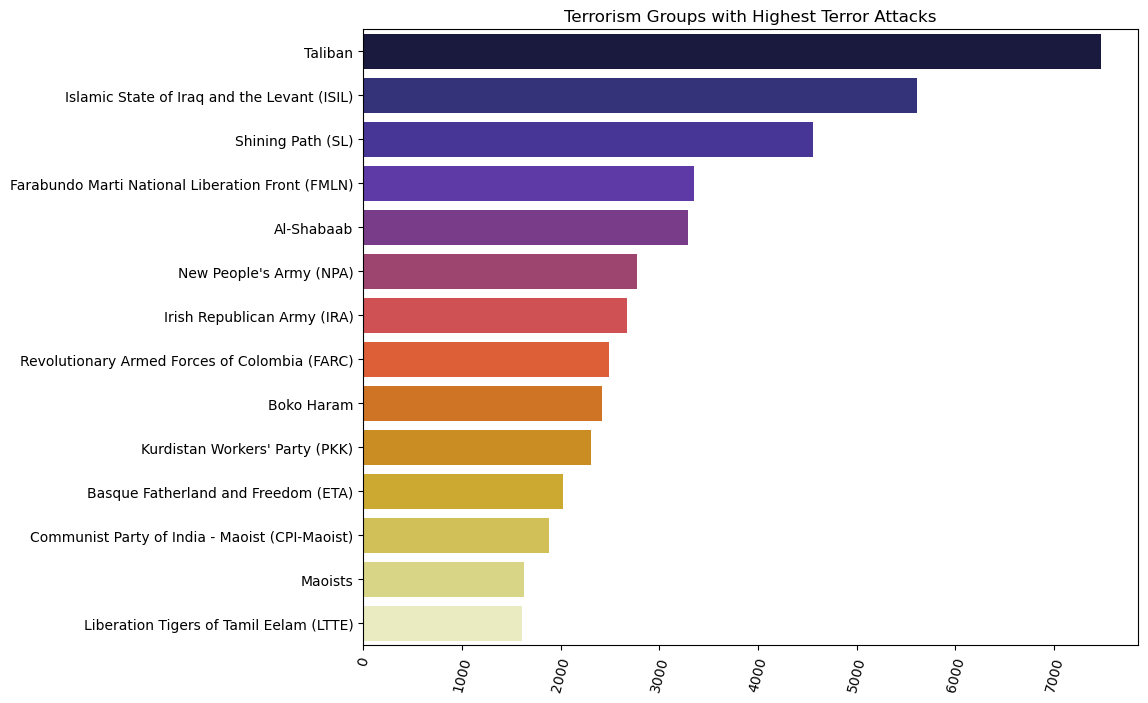

In [73]:
sns.barplot(df['Group'].value_counts()[1:15].values, df['Group'].value_counts()[1:15].index, palette=("CMRmap"))
plt.xticks(rotation=75)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title("Terrorism Groups with Highest Terror Attacks")
plt.show()

##### Insights:
- Taliban is the most notorious terrorist group.
- Followed by Islamic State of Iraq and the Levant (ISIL)			


### Activity of Top Terrorist Group

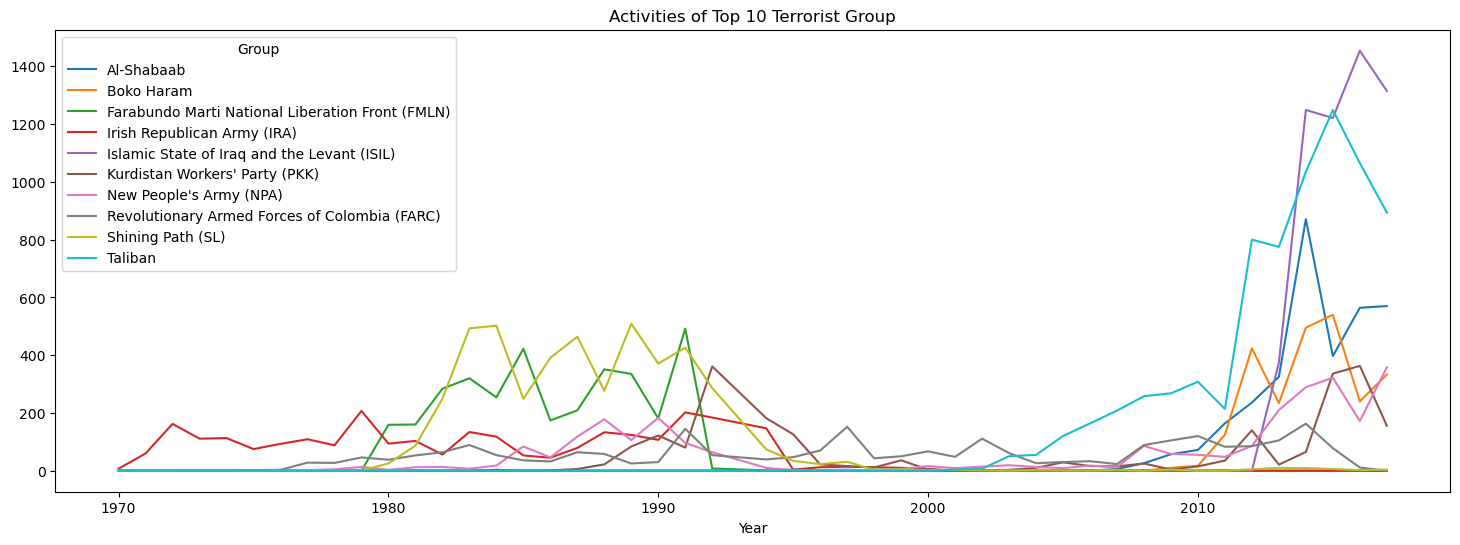

In [121]:
top_groups_10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups_10.Year,top_groups_10.Group).plot(color= sns.color_palette('tab10',10))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title("Activities of Top 10 Terrorist Group")
plt.show()

###### Insights:
- Islamic State of Iraq and the Levant (ISIL) is most active in 2016
- Tabliban is most active in 2015

### Most Notorious Groups in India and Most Poplular AttackType

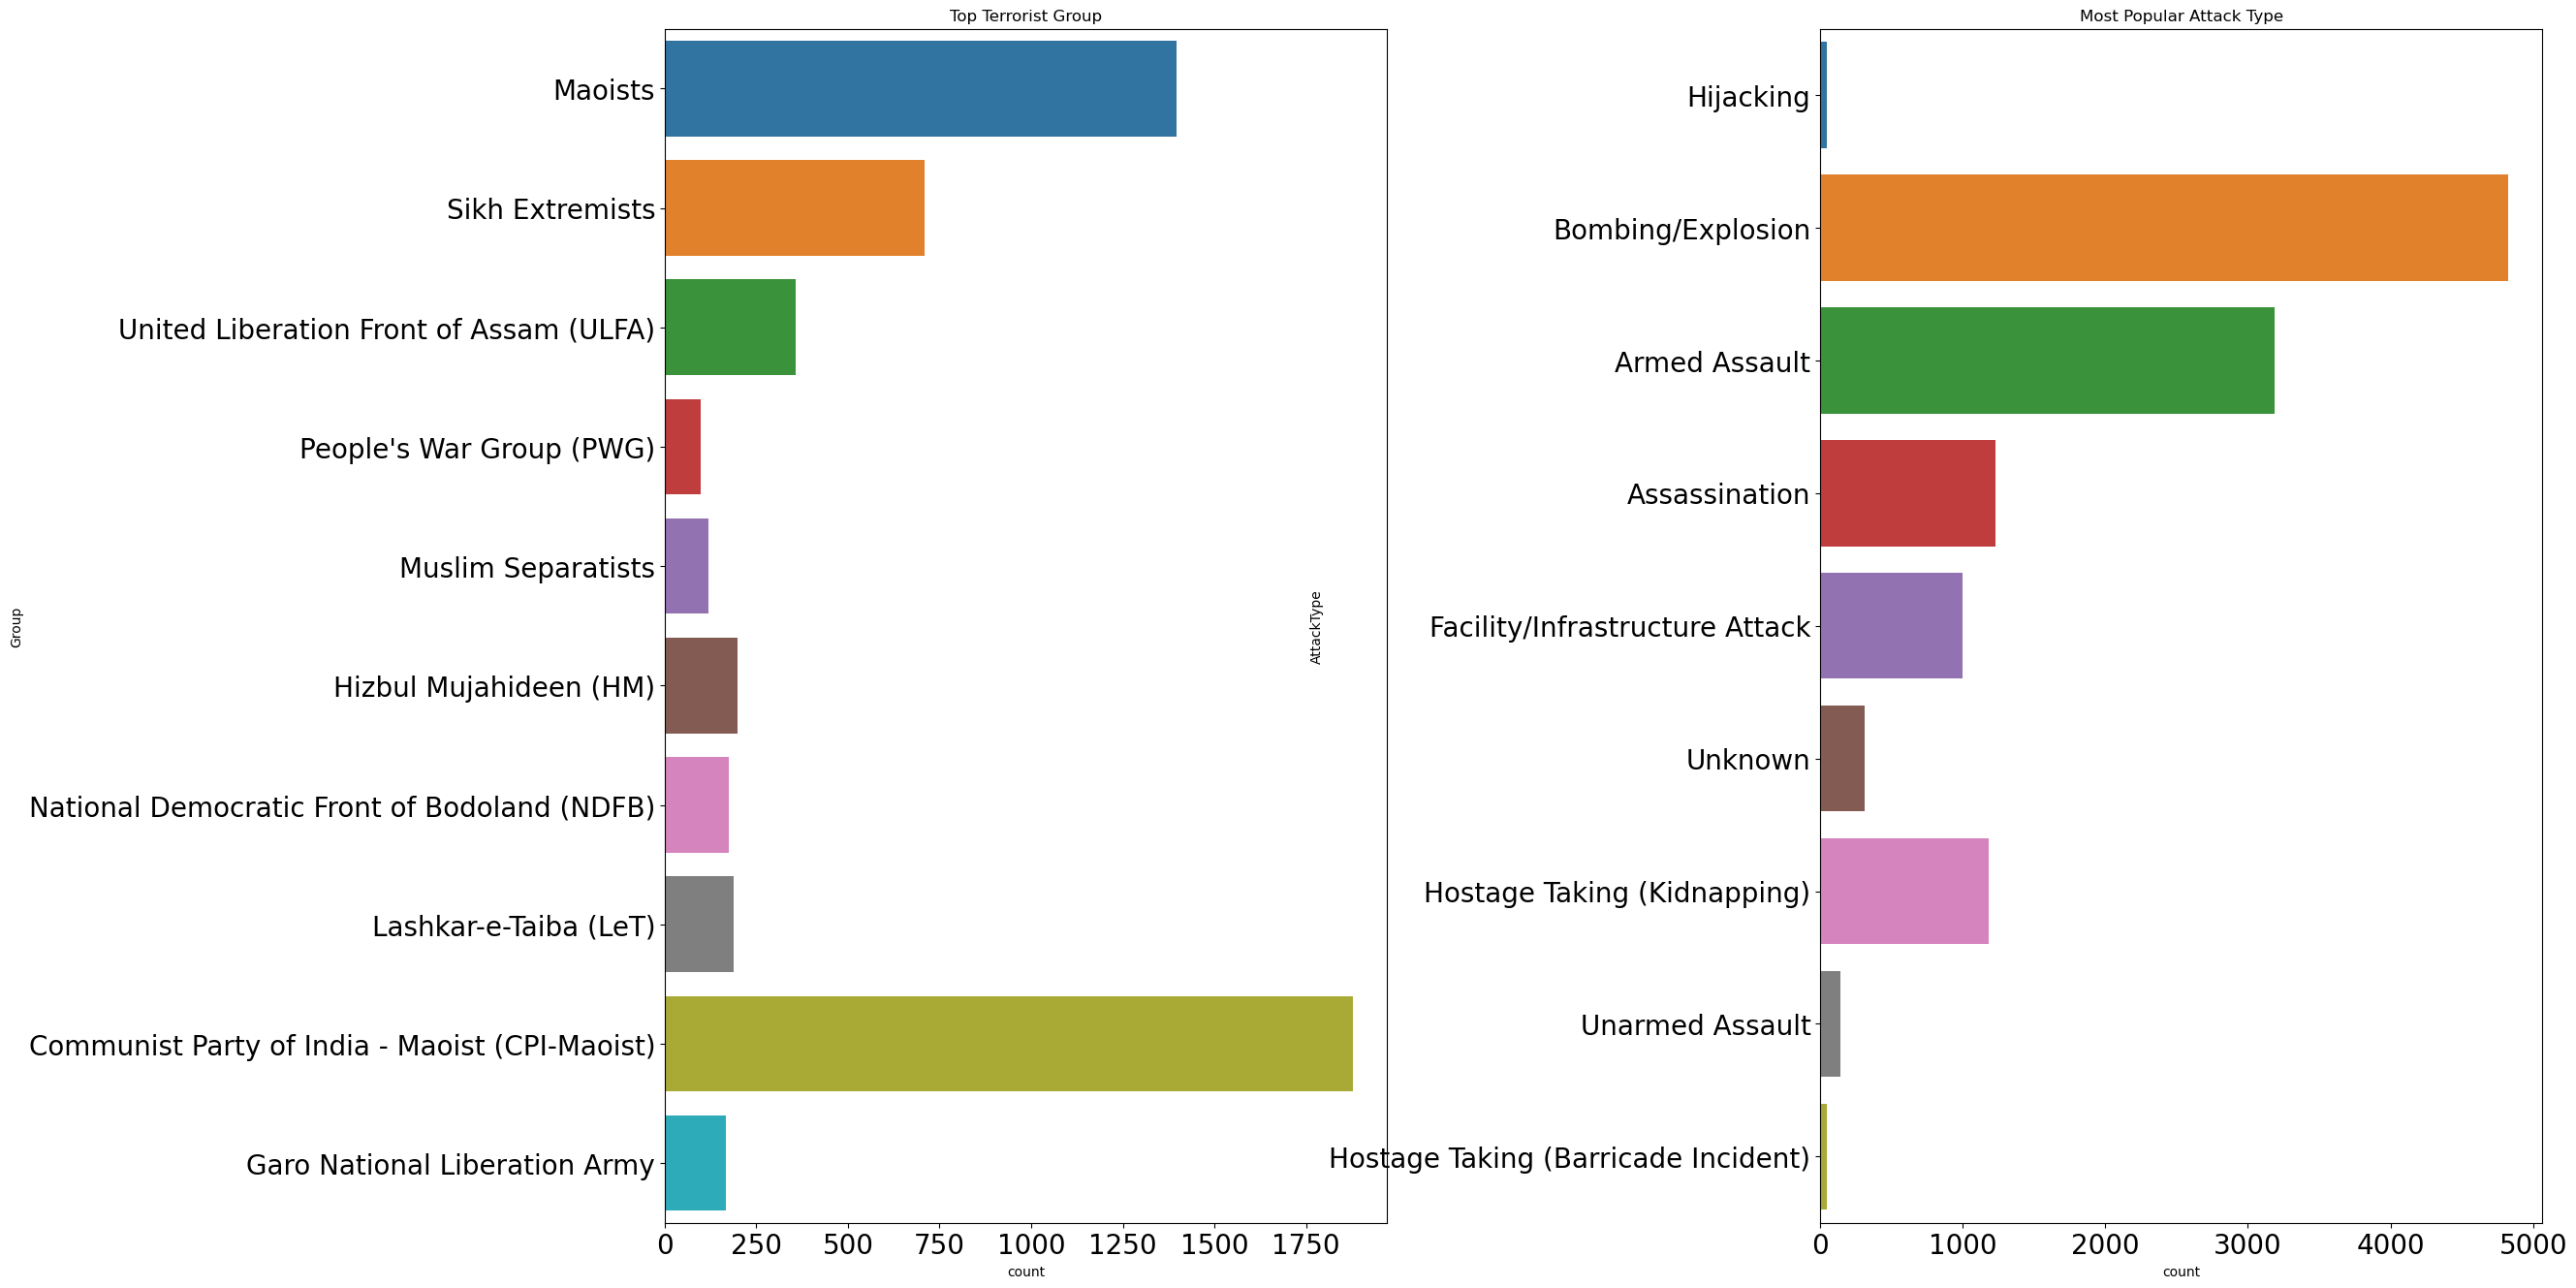

In [90]:
terror_india= df[df['Country']=='India']
f,ax = plt.subplots(1,2,figsize=(25,16))
ind_groups= terror_india['Group'].value_counts()[1:11].index
ind_groups= terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y="Group" ,data= ind_groups, ax=ax[0])
ax[0].set_title('Top Terrorist Group')
sns.countplot(y="AttackType" ,data= terror_india, ax=ax[1])
ax[1].set_title('Most Popular Attack Type')
plt.subplots_adjust(hspace=0.3, wspace=0.6)
ax[0].tick_params(labelsize=20)
ax[1].tick_params(labelsize=20)
plt.show()

##### Insights:
- The Most notorious terrorist group in India is the 'Communist Party of India-Maoist(CPI-Maoist)
- The Most popular attack type is Bombing/Explosion.

### Trend Before and after the War on Terrorism

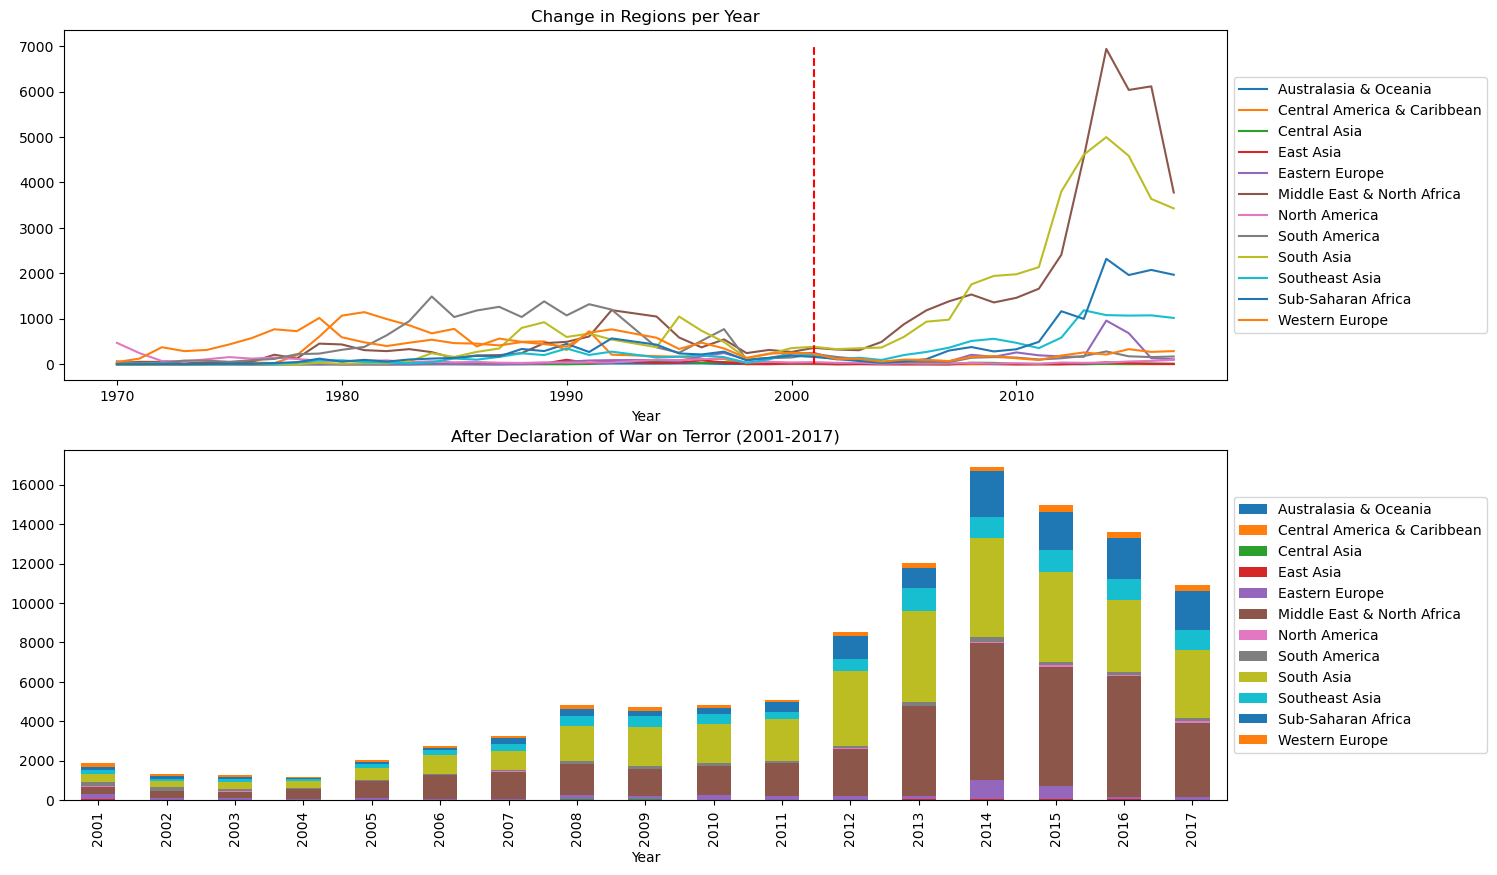

In [94]:
data_after = df[df['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

##### Insights:
-  it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well

### Conclusion:
1. Attacks has increased but number of people killed manier times as attack happened.
2. Iraq has the most attacks.
3. The Middle East and North Africa Regions has most taregeted.
4. Maximum number of attacks are from Bombing/Explosions.
5. There are maximum number of attacks in Private citizens and Property.
6. Taliban and ISIL has a most active organisation